In [113]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

source = 'https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/refs/heads/main/missions/W1/mtcars.csv'
df = pd.read_csv(source)

# 데이터셋의 컬럼 중 이름이 없는 컬럼을 찾아서 적합한 이름으로 변경하세요.
df.rename(columns={'Unnamed: 0':'model'}, inplace=True)

In [114]:
def mile_to_km(mile):
    return mile * 1.60934
def gallon_to_liter(gallon):
    return gallon * 3.78541
def mpg_to_kpl(mpg):
    return mpg * 0.425143  # mpg * mile_to_km(1) / gallon_to_liter(1)
def inch_to_cc(inch):
    return inch * 2.54
def cubic_inch_to_cc(cubic_inch):
    return cubic_inch * 16.3871 # cubic_inch * inch_to_cc(1) ** 3
def pound_to_kg(pound):
    return pound * 0.453592
def pound1000_to_ton(pound1000):
    return pound1000 * 0.453592

df_meter = df.copy()
df_meter['mpg'] = df_meter.apply(lambda row: mpg_to_kpl(row['mpg']), axis=1)
df_meter['disp'] = df_meter.apply(lambda row: cubic_inch_to_cc(row['disp']), axis=1)
df_meter['wt'] = df_meter.apply(lambda row: pound1000_to_ton(row['wt']), axis=1)
df_meter = df_meter.rename(columns={'mpg': 'kpl', 'disp': 'cc', 'wt': 'ton'})

In [115]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [116]:
df.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [117]:
row_counts = df.shape[0]
print(row_counts)

32


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [119]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [120]:
desc = df.describe()
cv = (desc.loc['std'] / desc.loc['mean']) * 100
desc.loc['cv'] = cv

desc

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.812500
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.615200
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.000000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.000000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.000000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.000000
cv,29.998808,28.863380,53.717791,46.740771,14.866382,30.412851,10.011588,115.203687,122.828533,20.008246,57.429333


# gear x transmission 조합 구하기

In [121]:
def get_unique_values_count(df, column_name):
    return len(df[column_name].unique())

print('gear의 수:', get_unique_values_count(df, 'gear'))
print('am의 수:', get_unique_values_count(df, 'am'))

gear의 수: 3
am의 수: 2


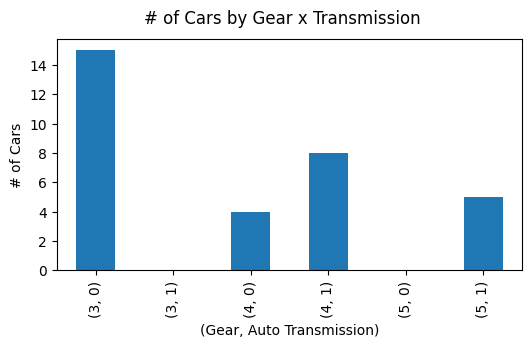

Transmission,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [122]:
fig, axes = plt.subplots(figsize=(6, 3))

crosstab = pd.crosstab(df['gear'], df['am']).rename_axis(columns={'am':'Transmission'})
ax = crosstab.stack().plot.bar(ax=axes)

plt.suptitle('# of Cars by Gear x Transmission')
plt.ylabel('# of Cars')
plt.xlabel('(Gear, Auto Transmission)')
plt.show()

crosstab

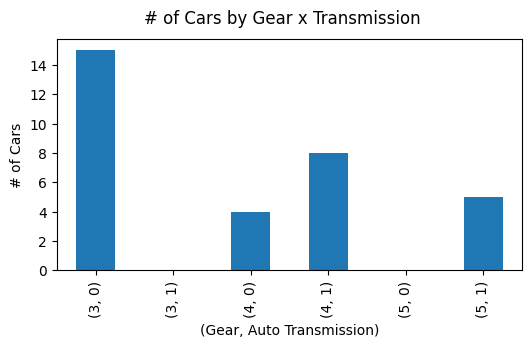

Transmission,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [123]:
fig, axes = plt.subplots(figsize=(6, 3))

groupby = df.groupby(['gear', 'am']).size().unstack(fill_value=0).rename_axis(columns={'am':'Transmission'})
ax = groupby.stack().plot.bar(ax=axes)

plt.suptitle('# of Cars by Gear x Transmission')
plt.ylabel('# of Cars')
plt.xlabel('(Gear, Auto Transmission)')
plt.show()

groupby

# Features 히스토그램

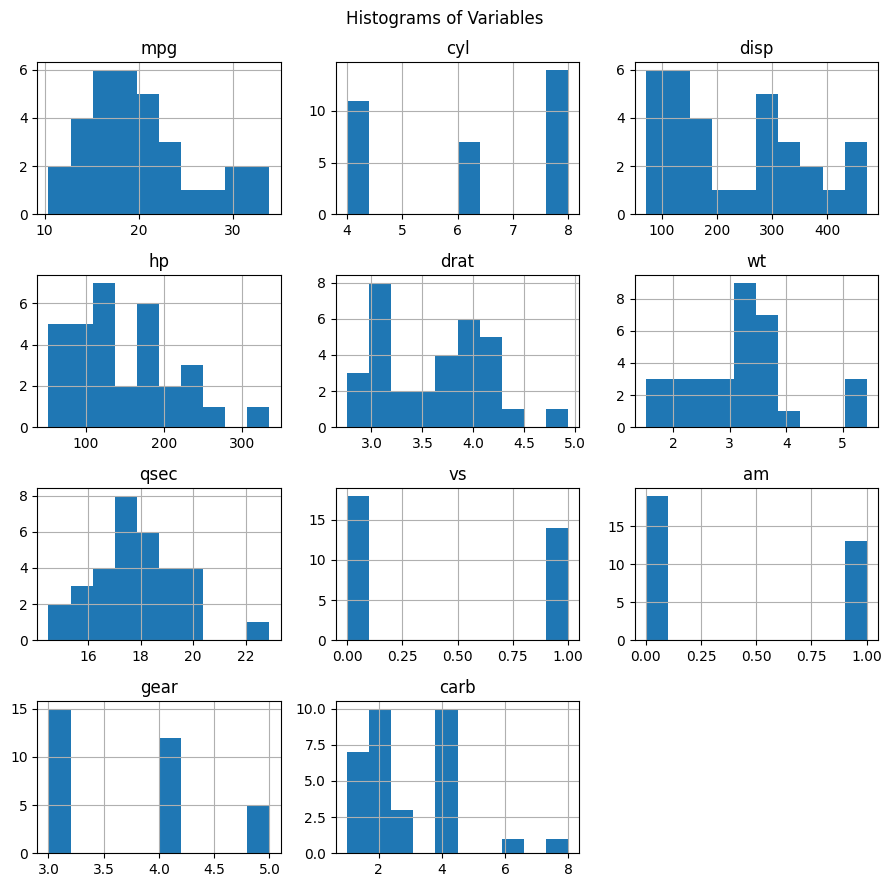

In [124]:
df.hist(figsize=(9, 9))
plt.suptitle("Histograms of Variables")
plt.tight_layout()
plt.show()

# Features 상관관계

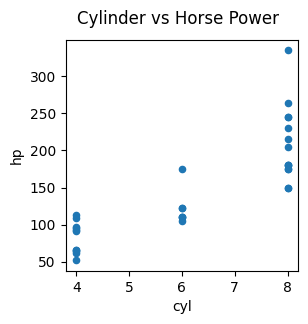

In [125]:
fig, axes = plt.subplots(figsize=(3, 3))
df.plot(x='cyl', y='hp', kind='scatter', ax=axes)
plt.suptitle("Cylinder vs Horse Power")
plt.show()

# plt.scatter()

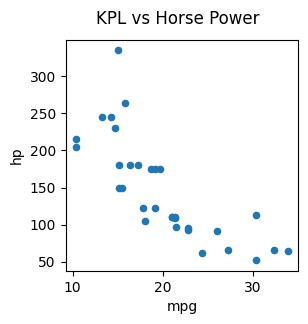

In [126]:
fig, axes = plt.subplots(figsize=(3, 3))
df.plot(x='mpg', y='hp', kind='scatter', ax=axes)
plt.suptitle("KPL vs Horse Power")
plt.show()

In [127]:
model_except = df.drop(columns=['model'])
correlation_matrix = model_except.corr(method='pearson')

pd.DataFrame(correlation_matrix)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


## Q. 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요?

주어진 데이터셋은 차량의 기능적인 스펙만 존재하고 가격과 사용자 경험에 대한 지표는 나와있지 않은 제한적인 데이터 셋입니다. 그렇기 때문에 오로지 스펙에서의 타사 대비 비교 우위를 분석함으로써 경제적인 가치를 탐색할 수 있습니다.

데이터셋을 분석하기에 앞서 사용자의 관점에서 차종을 구분하고 자사가 출시할 차량에 대한 포지셔닝이 선결되어야 합니다. 이후 차종 별 데이터 분석을 통해 자사가 더 잘 만들 수 있는 차량을 생산해야 합니다.

이를 기반으로 기능 별 예상 제작 비용 등 구체적인 속성이 추가될수록 더욱 정밀한 경제적 가치 측정이 가능합니다.

## Q. 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?

사용자 경험과 비용에 대한 자료가 존재하지 않기 때문에, 신차 제작 극초기 단계 기획에서 차종 별로 타사 대비 자사가 비교 우위를 점할 수 있는 차종과 정량적인 스펙을 설정하는데 활용할 수 있습니다.
특히 데이터 셋에 존재하는 속성 중 시장 경쟁력을 표현할 수 있는 스펙은 qsec, 차량의 속도입니다. 따라서 qsec을 기준으로 분석을 진행해 가장 시장 경쟁력 있는 차종과 스펙을 설정할 수 있습니다.

## Q. 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

다른 속성과 qsec 속성 간의 관계를 분석하였습니다.

(마력, 차량 중량)과 qsec 사이의 관계, V형 엔진의 유무와 qsec 사이의 관계에 대해 분석하였습니다.

vs 속성과 qsec의 상관계수는 0.744로 강한 상관관계를 보였습니다.
이는 V형 엔진은 출력이 좋지만 유지보수와 생산 단가가 높기 때문에 비교적 고성능의 차량에 사용되기 때문에 쉽게 예측할 수 있었고, 분석을 통해 검증할 수 있었습니다.

중량과 마력의 상관계수는 0.65로 어느정도의 상관관계를 보였습니다.
마력과 가속도의 상관계수는 0.7로 강한 상관관계를 보였습니다.
반면 중량과 가속도의 상관계수는 -0.17로 약한 상관관계를 보였습니다.

앞의 두 상관관계는 비교적 직관적으로 이해할 수 있었습니다. 마지막 중량과 가속도의 관계는 중량이 높은 차량은 마력이 강한 엔진을 탑재하지만 그 자체의 무게로 인해 가속도가 약해진다고 결론 내렸습니다.

분석을 통해 마력이 절대적으로 강하더라도 항상 가속도와의 높은 양의 상관관계를 보일 수 없다는 것, 직관적으로 이해되는 두 변수 사이의 관계가 제 3의 변수에 영향을 받을 수 있다는 것을 경험할 수 있었습니다.

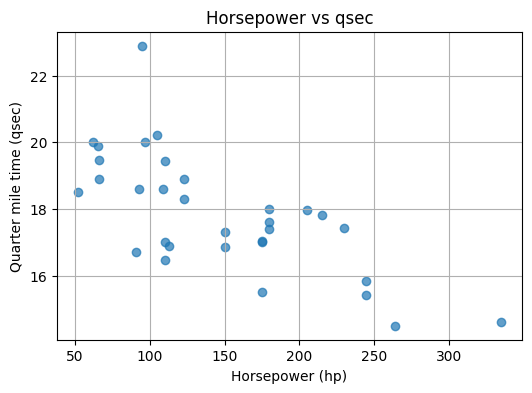

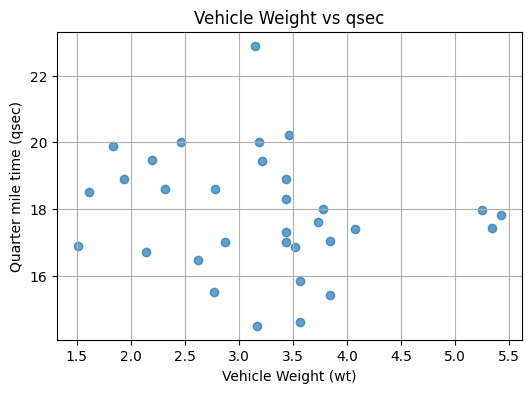

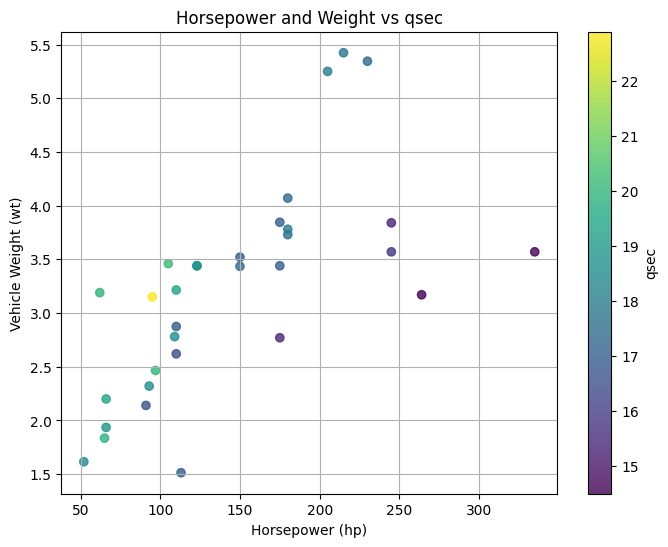

In [128]:
# 마력 vs qsec 산점도
plt.figure(figsize=(6, 4))
plt.scatter(df['hp'], df['qsec'], alpha=0.7)
plt.title('Horsepower vs qsec')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Quarter mile time (qsec)')
plt.grid(True)
plt.show()

# 차량 중량 vs qsec 산점도
plt.figure(figsize=(6, 4))
plt.scatter(df['wt'], df['qsec'], alpha=0.7)
plt.title('Vehicle Weight vs qsec')
plt.xlabel('Vehicle Weight (wt)')
plt.ylabel('Quarter mile time (qsec)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['hp'], df['wt'], c=df['qsec'], cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='qsec')
plt.title('Horsepower and Weight vs qsec')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Vehicle Weight (wt)')
plt.grid(True)
plt.show()

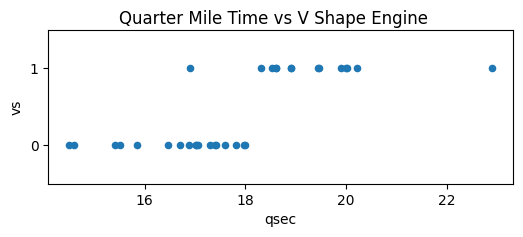

In [129]:
fig, axes = plt.subplots(figsize=(6, 2))
df.plot(x='qsec', y='vs', kind='scatter', ax=axes)
axes.set_yticks([0, 1])

plt.suptitle("Quarter Mile Time vs V Shape Engine")
axes.set_ylim(-0.5, 1.5)
plt.show()